In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
unlabeled_ds_path='../data/train/unlabeled_data.csv'
result_csv_path='../data/train/unlabeled_data_labeled.csv'
unlabeled_df=pd.read_csv(unlabeled_ds_path,index_col='id')

In [8]:
class_label_to_class_dict = {0: '家居', 1: '房产', 2: '教育', 3: '时尚', 4: '时政', 5: '科技', 6: '财经', 7: '游戏', 8: '娱乐', 9: '体育'}

shot_key_word_dict=dict()
shot_key_word_dict[7]=['玩家', '玩法', '通关', '游戏', '攻略', '手游', '端游', '网游', '近战'] # 游戏
shot_key_word_dict[8]=['明星', '粉丝', '上映', '导演', '演员', '主演', '编剧', '热播', '档期', '动画', '影视', '电影', '制片人', '票房', '定档', '媒体', '影片', '执导', '影业', '影片', '综艺'] # 娱乐
shot_key_word_dict[9]=['参赛', '锦标赛', '退赛', '国家队', '运动员', '表演赛', '球衣', 'NBA', '奥运会', '体育', '球迷', '队员'] # 体育

In [9]:
sub_df=pd.DataFrame(columns=['content','class_label'])
for key in shot_key_word_dict.keys():
    words_in_other_keys=[]
    for other_key in shot_key_word_dict.keys():
        if key!=other_key:
            words_in_other_keys.extend(shot_key_word_dict[other_key])
    regex_pat='|'.join(str(word) for word in words_in_other_keys)
    for word in shot_key_word_dict[key]:
        # print(word)
        
        filtered_df=unlabeled_df[unlabeled_df['content'].str.contains(word)]
        filtered_df=filtered_df[~filtered_df['content'].str.contains(regex_pat,regex=True)]
        filtered_df['class_label']=class_label_to_class_dict[key]
        filtered_df['by_word']=word

        sub_df=sub_df.append(filtered_df)

print(len(sub_df))
sub_df=sub_df.drop_duplicates(subset=['content']) # 去除重复的content
print(len(sub_df))
sub_df.to_csv(result_csv_path,index=False)

37445
13176


dict_keys(['娱乐', '游戏', '体育'])
娱乐    6647
游戏    4159
体育    2370
Name: class_label, dtype: int64


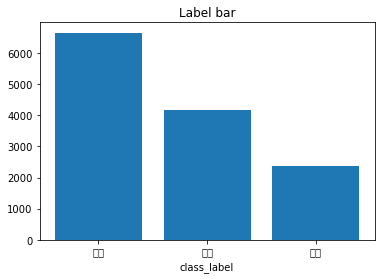

In [11]:
# 类别分布
label_cnts=dict(sub_df['class_label'].value_counts())
plt.bar(label_cnts.keys(),label_cnts.values())
plt.xlabel('class_label')
plt.title('Label bar')
print(label_cnts.keys())
print(sub_df['class_label'].value_counts())